# Time series analysis

## statsmodels
statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = sm.datasets.macrodata.load_pandas().data

In [3]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [6]:
df.index = index

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'REAL GDP')

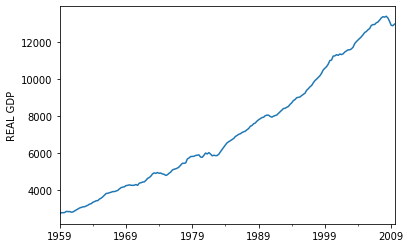

In [8]:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

### Use statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series y_t into a trend τ_t and a cyclical component ζt:

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function:

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [9]:
# Tuple unpacking
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [10]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


In [11]:
type(gdp_cycle)

pandas.core.series.Series

In [12]:
df["trend"] = gdp_trend

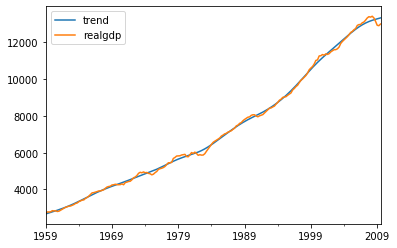

In [13]:
df[['trend','realgdp']].plot()

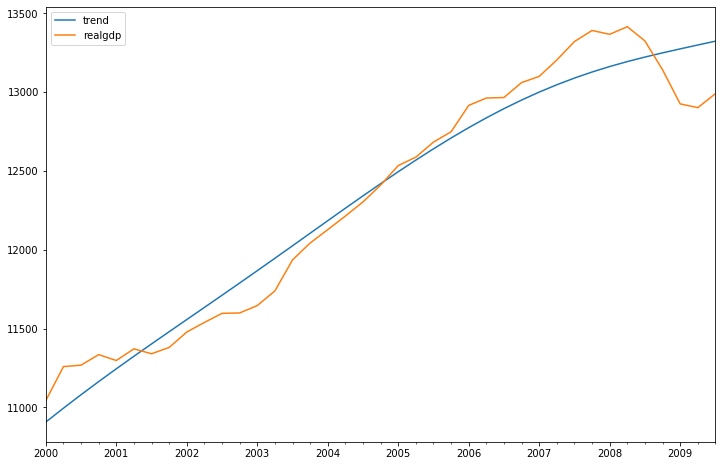

In [14]:
df[['trend', 'realgdp']]["2000-03-31":].plot(figsize=(12, 8))

## SMA & EWMA

In [15]:
airline = pd.read_csv('datasets/airline_passengers.csv', index_col="Month")

In [16]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [17]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Simple moving average (SMA)

In [18]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [19]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


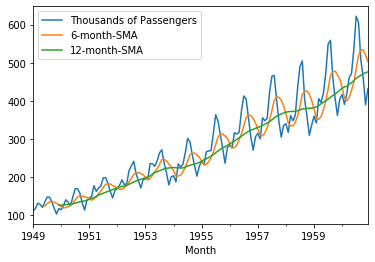

In [20]:
airline.plot()

### Exponentially-weighted moving average (EWMA)
We just showed how to calculate the SMA based on some window. However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal.
* It will always lag by the size of the window.
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly.

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

Full details on Mathematics behind this can be found [here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows). Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

Where `x_t` is the input value, `w_i` is the applied weight (Note how it can change from `i=0 to t`), and `y_t` is the output.

Now the question is, how to we define the weight term `w_i`?

This depends on the adjust parameter you provide to the `.ewm()` method.

When adjust is True (default), weighted averages are calculated using weights:

$y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When `adjust=False` is specified, moving averages are calculated as:

$\begin {split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t, \end{split}$

which is equivalent to using weights:

\begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When `adjust=True` we have `y0=x0` and from the last representation above we have `yt=αxt+(1−α)yt−1`, therefore there is an assumption that `x0` is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have `0<α≤1`, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}
 
* Span corresponds to what is commonly called an "N-day EW moving average".
* Center of mass has a more physical interpretation and can be thought of in terms of span: `c=(s−1)/2`.
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

In [21]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

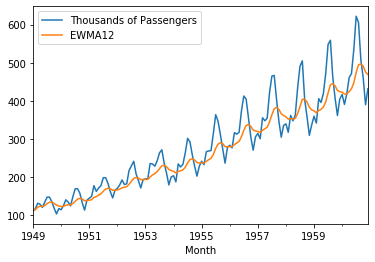

In [22]:
airline[['Thousands of Passengers','EWMA12']].plot()

## ETS decomposition

In [23]:
airline = pd.read_csv('datasets/airline_passengers.csv', index_col="Month")

In [24]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


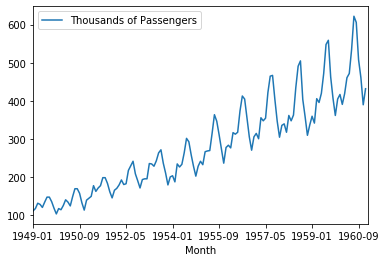

In [25]:
airline.plot()

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

Based off this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a bit hard to tell from this one plot).

In [26]:
# Get data in correct format
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [27]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


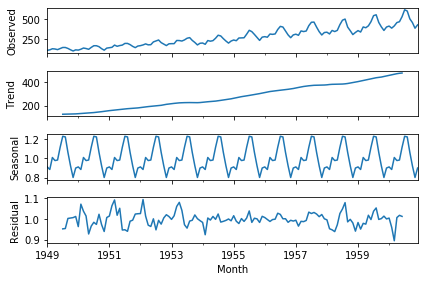

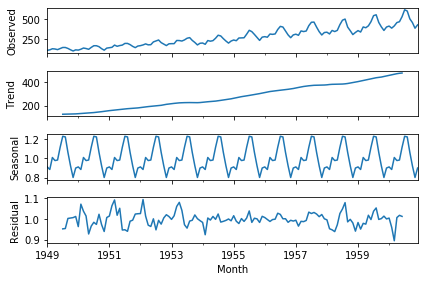

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.plot()
# You may accidentally see two of the same plots here, not to worry, just a small bug with statsmodels function.

## ARIMA and Seasonal ARIMA
The general process for ARIMA (Autoregressive Integrated Moving Averages) models is the following:
* Visualize the time series data.
* Make the time series data stationary.
* Plot the correlation and autocorrelation charts.
* Construct the ARIMA model.
* Use the model to make predictions.

In [29]:
# Load the data
milk_production = pd.read_csv('datasets/monthly_milk_production.csv')

In [30]:
milk_production.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [31]:
milk_production.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [32]:
# Clean up
milk_production.columns = ['Month', 'Milk in Pounds per Cow']
milk_production.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [33]:
# Weird last value at bottom causing issues
milk_production.drop(168,
                     axis = 0,
                     inplace = True)

In [34]:
# Reformat the dates
milk_production['Month'] = pd.to_datetime(milk_production['Month'])

In [35]:
milk_production.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [36]:
# set_index
milk_production.set_index('Month', inplace=True)

In [37]:
milk_production.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [38]:
milk_production.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


### Data Visualization

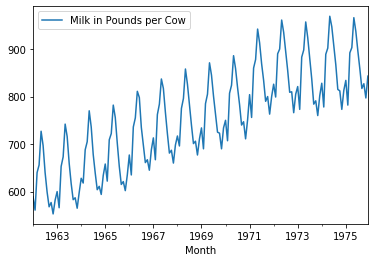

In [39]:
# Visualize the data
milk_production.plot()

In [40]:
time_series = milk_production['Milk in Pounds per Cow']

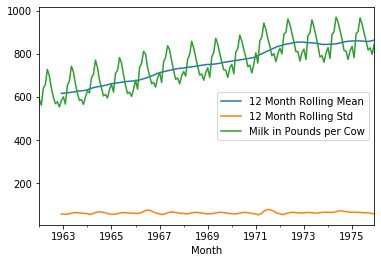

In [41]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

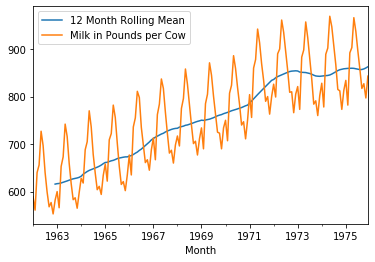

In [42]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.plot()
plt.legend()

### Decomposition

<Figure size 432x288 with 0 Axes>

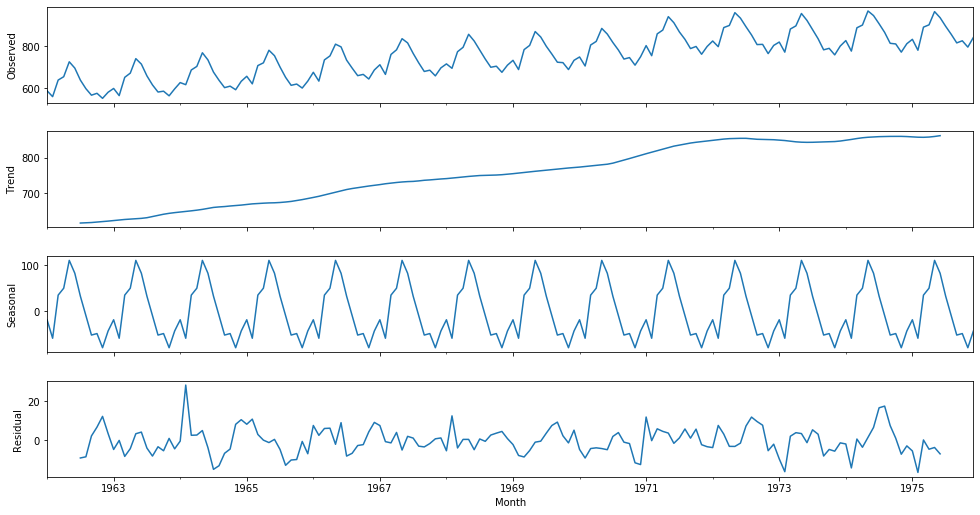

In [43]:
# ETS decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(milk_production['Milk in Pounds per Cow'], 
                                   freq=12)  
fig = plt.figure()
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

### Test for Stationarity
We can use the [Augmented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis $H0$ (that the time series has a unit root, indicating it is non-stationary) or reject $H0$ and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically $≤ 0.05$) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value ($> 0.05$) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

In [44]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(milk_production['Milk in Pounds per Cow'])

In [45]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

for value,label in zip(result,labels):
    print(label + ' : ' + str(value))
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221299
p-value : 0.6274267086030314
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [46]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label + ' : ' + str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data. Typically financial stock data won't be seasonal.

### Differencing
The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [47]:
# First difference
milk_production['Milk First Difference'] = milk_production['Milk in Pounds per Cow'] - milk_production['Milk in Pounds per Cow'].shift(1)

In [48]:
adf_check(milk_production['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530513
p-value : 0.030068004001787173
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


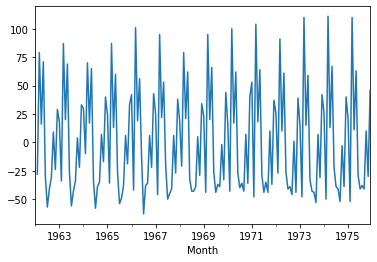

In [49]:
milk_production['Milk First Difference'].plot()

In [50]:
# Second difference
# This is just for tutorial purpose, we don't need to do a second difference in our case
milk_production['Milk Second Difference'] = milk_production['Milk First Difference'] - milk_production['Milk First Difference'].shift(1)

In [51]:
adf_check(milk_production['Milk Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603352
p-value : 1.1126989332082667e-26
#Lags Used : 11
Number of Observations Used : 154
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


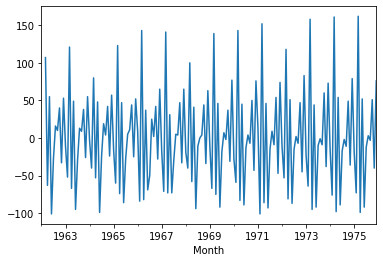

In [52]:
milk_production['Milk Second Difference'].plot()

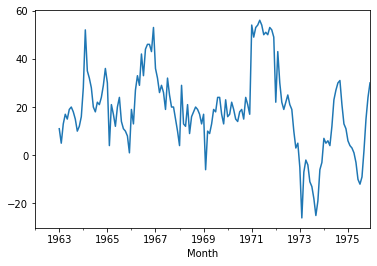

In [53]:
# Seasonal difference
milk_production['Seasonal Difference'] = milk_production['Milk in Pounds per Cow'] - milk_production['Milk in Pounds per Cow'].shift(12)
milk_production['Seasonal Difference'].plot()

In [54]:
# Seasonal difference by itself is not enough
adf_check(milk_production['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359399
p-value : 0.1607988052771132
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


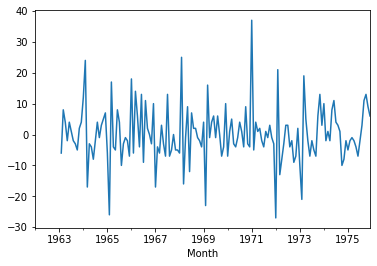

In [55]:
# Seasonal first difference
milk_production['Seasonal First Difference'] = milk_production['Milk First Difference'] - milk_production['Milk First Difference'].shift(12)
milk_production['Seasonal First Difference'].plot()

In [56]:
adf_check(milk_production['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.03800227492198
p-value : 1.865423431878859e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Autocorrelation
An autocorrelation plot (also known as a [correlogram](https://en.wikipedia.org/wiki/Correlogram) shows the correlation of the series with itself, lagged by $x$ time units. So the $y$ axis is the correlation and the $x$ axis is the number of time units of lag.

So imagine taking your time series of length $T$, copying it, and deleting the first observation of copy $\#1$ and the last observation of copy $\#2$. Now you have two series of length $T−1$ for which you calculate a correlation coefficient. This is the value of of the vertical axis at $x=1$ in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags $x$ and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

If the autocorrelation plot shows positive autocorrelation at the first lag ($lag-1$), then it suggests to use the AR terms in relation to the lag

If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

Here we will be showing running the ACF and PACF on multiple differenced data sets that have been made stationary in different ways, typically you would just choose a single stationary data set and continue all the way through with that.

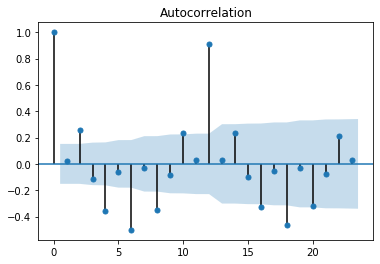

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig_first = plot_acf(milk_production["Milk First Difference"].dropna())

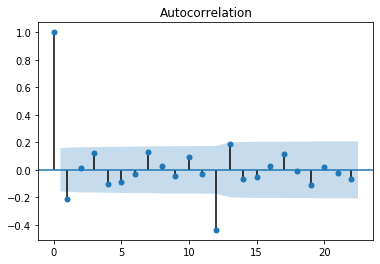

In [58]:
fig_seasonal_first = plot_acf(milk_production["Seasonal First Difference"].dropna())

Pandas also has this functionality built in, but only for ACF, not PACF. So I recommend using statsmodels, as ACF and PACF is more core to its functionality than it is to pandas' functionality.

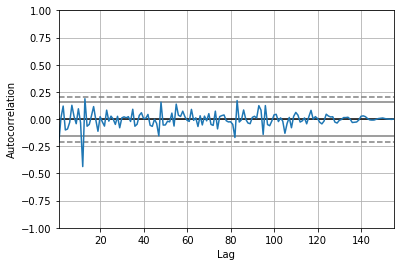

In [59]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(milk_production['Seasonal First Difference'].dropna())

### Partial Autocorrelation
In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which $y =$ response variable and $x1$, $x2$, and $x3$ are predictor variables. The partial correlation between $y$ and $x3$ is the correlation between the variables determined taking into account how both $y$ and $x3$ are related to $x1$ and $x2$.

Formally, this is relationship is defined as:

\begin{equation}
\frac{Covariance(y,x_{3}|x_{1},x_{2})}{\sqrt{Variance(y|x_{1},x_{2})Variance(x_{3}|x_{1},x_{2})}}
\end{equation}

For more details, please refer to this [link](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm).

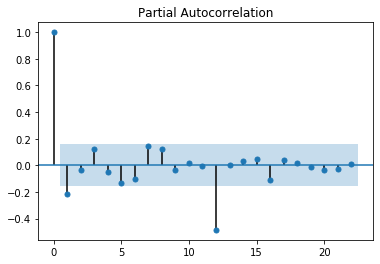

In [60]:
partial_fig_seasonal_first = plot_pacf(milk_production["Seasonal First Difference"].dropna())

Typically a sharp drop after lag $k$ suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

Final thoughts on Autocorrelation and Partial Autocorrelation:
* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF "shuts off" past the order of the model.  The phrase "shuts off" means that in theory the partial autocorrelations are equal to $0$ beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the "order of the model" we mean the most extreme lag of $x$ that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward $0$ in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

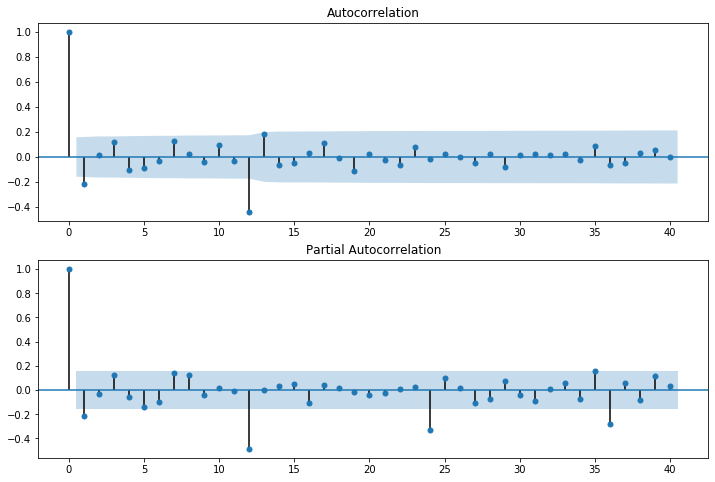

In [61]:
# Final ACF and PACF plots
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(milk_production['Seasonal First Difference'].iloc[13:], 
                               lags=40, 
                               ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(milk_production['Seasonal First Difference'].iloc[13:], 
                                lags=40, 
                                ax=ax2)

### Seasonal ARIMA

In [62]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


p,d,q parameters:
* **p:** the number of lag observations included in the model.
* **d:** the number of times that the raw observations are differenced, also called the degree of differencing.
* **q:** the size of the moving average window, also called the order of moving average.

In [63]:
# For seasonal data
model = sm.tsa.statespace.SARIMAX(milk_production['Milk in Pounds per Cow'],
                                  order=(0, 1, 0), 
                                  seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

C:\Users\z00045494\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Mon, 09 Sep 2019   AIC                           1074.131
Time:                                    16:17:43   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

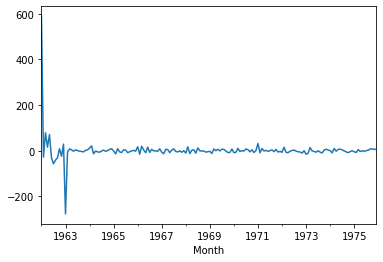

In [64]:
results.resid.plot()

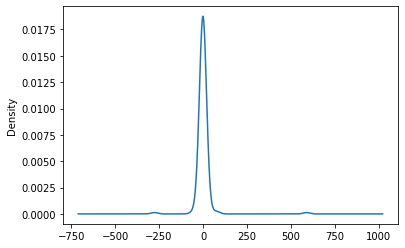

In [65]:
results.resid.plot(kind='kde')

### Prediction of Future Values
Firts we can get an idea of how well our model performs by just predicting for values that we actually already know.

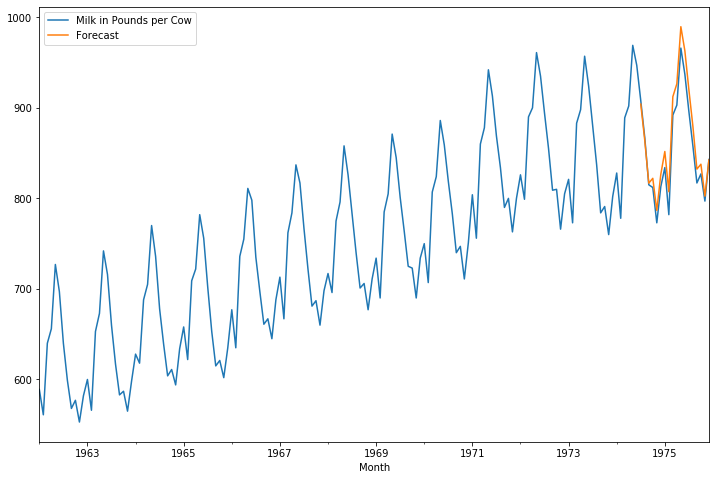

In [66]:
milk_production['Forecast'] = results.predict(start=150, 
                                              end=168, 
                                              dynamic=True)  
milk_production[['Milk in Pounds per Cow', 'Forecast']].plot(figsize=(12, 8))

### Forecasting
This requires more time periods, so let's create them with pandas onto our original dataframe.

In [67]:
milk_production.tail()

,Milk in Pounds per Cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,Forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,879.668974
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,832.328554
1975-10-01,827.0,10.0,51.0,15.0,13.0,837.722250
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,802.452737
1975-12-01,843.0,46.0,76.0,30.0,6.0,842.499871


In [68]:
from pandas.tseries.offsets import DateOffset

future_dates = [milk_production.index[-1] + DateOffset(months=x) for x in range(0, 24)]
# Alternatives 
# pd.date_range(milk_production.index[-1], periods=12, freq='M')

In [69]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [70]:
future_dates_milk_production = pd.DataFrame(index=future_dates[1:],
                                            columns=milk_production.columns)

In [71]:
future_milk_production = pd.concat([milk_production, future_dates_milk_production])

In [72]:
future_milk_production.head()

,Milk in Pounds per Cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,Forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [73]:
future_milk_production.tail()

,Milk in Pounds per Cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,Forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


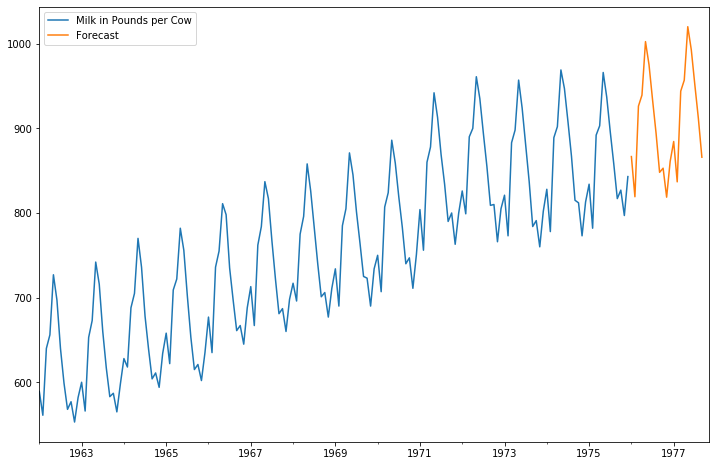

In [74]:
future_milk_production['Forecast'] = results.predict(start=168, 
                                                     end=188, 
                                                     dynamic=True)  
future_milk_production[['Milk in Pounds per Cow', 'Forecast']].plot(figsize=(12, 8))

The result is not bad. Pretty cool in fact. Unfortunately, a lot of financial data won't follow this sort of behaviour, in fact it will often follow something indicating brownian motion.